This is the rough flow required for converting receipt data from a PDF to a spreadsheet that can be analyzed. 

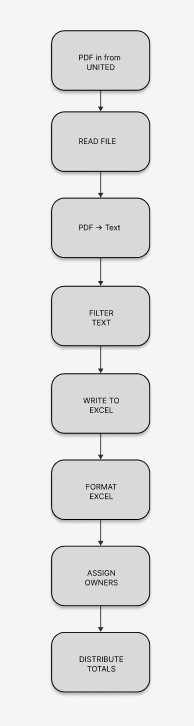

Each of these stages is critical to the final outcome. Filtering the Text and Writing to Excel have proven to be the meat of the matter.